# 训练模型

In [401]:
# 导入数据
d = pd.read_csv("2C4KPdNoise.csv")

# 训练集和测试集划分
from sklearn.cross_validation import train_test_split
n1 = d.shape[1]-1
X, y = d.iloc[:, 0:n1].values, d.iloc[:, n1].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=0)
print ("X_train shape:",X_train.shape) 
print ("X_test  shape:",X_test.shape) 
print ("Y_train shape:",y_train.shape) 
print ("Y_test  shape:",y_test.shape) 

X_train shape: (1600, 18)
X_test  shape: (400, 18)
Y_train shape: (1600,)
Y_test  shape: (400,)


In [203]:
X_train

array([[  1.38899300e+06,   1.50000000e+01,   4.00000000e+00, ...,
          2.23168500e+01,   1.35612900e+01,   4.65606000e+01],
       [  1.20727300e+06,   1.80000000e+01,   8.00000000e+00, ...,
          2.75384700e+01,   6.30489500e+00,   7.40933400e+01],
       [  1.28979600e+06,   1.30000000e+01,   5.00000000e+00, ...,
          2.07417700e+01,   1.19740900e+01,   2.34451500e+02],
       ..., 
       [  5.16846000e+05,   1.10000000e+01,   4.00000000e+00, ...,
          1.76379100e+01,   1.93581700e+01,   3.35311800e+01],
       [  3.49382000e+05,   1.70000000e+01,   7.00000000e+00, ...,
          2.53679000e+01,   7.46640100e+00,   4.24572200e+01],
       [  3.91965000e+05,   1.60000000e+01,   4.00000000e+00, ...,
          2.51039000e+01,   8.19313800e+00,   4.59102200e+02]])

In [199]:
X_test

array([[  3.95197000e+05,   1.70000000e+01,   9.00000000e+00, ...,
          2.70542200e+01,   7.78568800e+00,   2.95235300e+01],
       [  2.16632000e+05,   1.70000000e+01,   4.00000000e+00, ...,
          2.79565800e+01,   9.43869300e+00,   1.09992200e+02],
       [  9.82882000e+05,   1.60000000e+01,   6.00000000e+00, ...,
          2.52976700e+01,   7.61000600e+00,   7.91965600e+01],
       ..., 
       [  1.24377200e+06,   1.20000000e+01,   4.00000000e+00, ...,
          1.78536500e+01,   1.76843700e+01,   7.25958500e+02],
       [  2.79615000e+05,   1.70000000e+01,   8.00000000e+00, ...,
          2.59784800e+01,   6.58286100e+00,   2.80064700e+02],
       [  1.25458300e+06,   1.40000000e+01,   4.00000000e+00, ...,
          2.06450900e+01,   9.73513400e+00,   3.04416500e+01]])

In [22]:
# 定义pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
            ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.752


In [27]:
# 利用交叉验证获取模型较好的参数
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator=pipe_lr, 
                         X=X_train, 
                         y=y_train, 
                         cv=10,
                         n_jobs=-1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.74074074  0.72222222  0.77160494  0.7962963   0.75        0.78616352
  0.75471698  0.79245283  0.7278481   0.75796178]
CV accuracy: 0.760 +/- 0.025


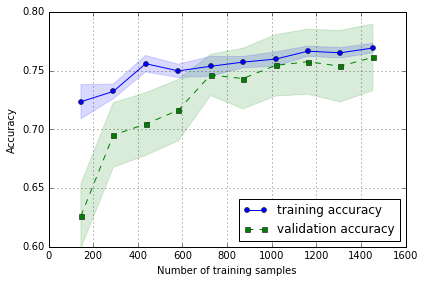

In [37]:
# 使用learning curve来评估bias和variance
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
            ('clf', LogisticRegression(penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                cv=11,
                n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 0.8])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

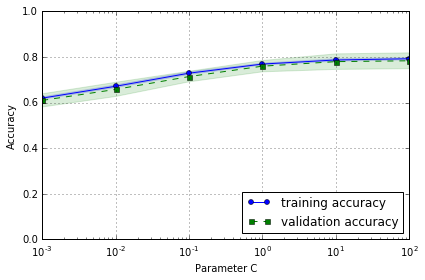

In [39]:
# 从validation curve评定参数
from sklearn.learning_curve import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

# SGD模型设置


## 单独跑下SGD

In [355]:
clf = SGDClassifier(loss='modified_huber', random_state=1, n_iter=1)
scl = StandardScaler()
X_train_scl = scl.fit_transform(X_train)
X_test_scl = scl.transform(X_test)

In [356]:
pbar = pyprind.ProgBar(10000)
classes = np.array([1,2,3,4,5])
for _ in range(10000):
    clf.partial_fit(X_train_sc1,y_train,classes=classes)
    pbar.update()

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:16


In [357]:
clf.score(X_test_scl,y_test)

0.77500000000000002

In [358]:
clf.score(X_train_sc1,y_train)

0.78187499999999999

## 为后面的app开发做铺垫

In [ ]:
def stream_docs(path):
    while True:
        with open(path, 'r') as csv:
            next(csv) # skip header
            for line in csv:
                data = [float(i) for i in line.strip().split(',')]
                x = data[:-1]
                y = data[-1]
                yield x, y 

            
def get_minibatch(doc_stream, size):
    X, Y = [], []
    try:
        for _ in range(size):
            x, y = next(doc_stream)
            X.append(x)
            Y.append(y)
    except StopIteration:
        return None, None
    return np.array(X), np.array(Y)

In [402]:
scl = StandardScaler()
clf = SGDClassifier(loss='modified_huber', random_state=1, n_iter=1)
doc_stream = stream_docs('2C4KPdNoise.csv')

X_train_scl = scl.fit_transform(X_train)
X_test_scl = scl.transform(X_test)

classes = np.array([1,2,3,4,5])

import pyprind
pbar = pyprind.ProgBar(1000)

for _ in range(1000):
    #获取batch文件
    mini_x, mini_y = get_minibatch(doc_stream, size=2000)
    #对batch文件进行处理
    mini_x = scl.transform(mini_x)
    if type(mini_x) == type(None):
        break
#     print (_)
    clf.partial_fit(mini_x, mini_y, classes=classes)
    pbar.update()

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:28


In [407]:
clf.score(X_test_scl,y_test)

0.78000000000000003

# WebApp设置

In [410]:
dest

'pdclassifier\\pkl_objects'

In [411]:
import pickle
import os
dest = os.path.join('pdclassifier', 'pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)
pickle.dump(scl, open(os.path.join(dest, 'scaler.pkl'), 'wb'), protocol=4)   
pickle.dump(clf, open(os.path.join(dest, 'classifier.pkl'), 'wb'), protocol=4)

In [ ]:
%%writefile pdclassifier/vectorizer.py
from sklearn.feature_extraction.text import HashingVectorizer
import re
import os
import pickle

cur_dir = os.path.dirname(__file__)
stop = pickle.load(open(
                os.path.join(cur_dir, 
                'pkl_objects', 
                'stopwords.pkl'), 'rb'))

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) \
                   + ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized

vect = HashingVectorizer(decode_error='ignore',
                         n_features=2**21,
                         preprocessor=None,
                         tokenizer=tokenizer)

In [416]:
import pickle
import re
import os

scl = pickle.load(open(os.path.join('pkl_objects', 'scaler.pkl'), 'rb'))
clf = pickle.load(open(os.path.join('pkl_objects', 'classifier.pkl'), 'rb'))

## 建立SQL数据库

In [458]:
import sqlite3

conn = sqlite3.connect('pd.sqlite')

c = conn.cursor()
c.execute('DROP TABLE IF EXISTS pd_data')
c.execute('CREATE TABLE pd_data ( \
    pd_location   INTEGER, \
    signal_width  INTEGER, \
    rise_time INTEGER, \
    fall_time INTEGER, \
    peak_voltage  INTEGER, \
    polarity  INTEGER, \
    mean_voltage  INTEGER, \
    rms   INTEGER, \
    sd    INTEGER, \
    skewness  INTEGER, \
    kurtosis  INTEGER, \
    crest INTEGER, \
    form_factor   INTEGER, \
    MainFreq  INTEGER, \
    phase_angle   INTEGER, \
    T INTEGER, \
    W INTEGER, \
    pC    INTEGER, \
    pd_class  INTEGER )')
conn.commit()
conn.close()

disk_engine = create_engine('sqlite:///pd.sqlite') # Initializes database with filename 311_8M.db in current directory
d.to_sql('pd_data', disk_engine, if_exists='append',index=False)

In [498]:
conn = sqlite3.connect('pd.sqlite')
c = conn.cursor()

In [511]:
c.execute("INSERT INTO pd_data (pd_location, signal_width, rise_time, fall_time, peak_voltage,polarity, mean_voltage, rms, sd, skewness, kurtosis,crest, form_factor, MainFreq, phase_angle, T, W, pC,pd_class)"\
	    " VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", np.hstack([data,y]))

In [512]:
conn.commit()
conn.close()